In [1]:
import sys, os
import matplotlib.pyplot as plt

root_dir = os.getcwd() + '/finaldata'
train_dir = root_dir + '/train/'
# val_dir = root_dir + '/val/'
test_dir = root_dir + '/test/'

In [2]:
def get_value(root, split=0, train=False):
    imgs=[os.path.join(root,f) for f in os.listdir(root)]
    if split and train:
        count = len(imgs)
        imgs = imgs[:int(split * count)]
    elif split and not train:
        count = len(imgs)
        imgs = imgs[int(split * count):]
    nomask = nonface = face = 0
    for img in imgs:
        symbol = img.split('/')[-1].split('.')[0].split('_')[-1]
        if symbol == 'face': face += 1
        elif symbol == 'nomask': nomask += 1
        elif symbol == 'nonface': nonface += 1
    return [nonface, nomask, face]

[268, 220, 262] [45, 45, 43] [56, 66, 54]


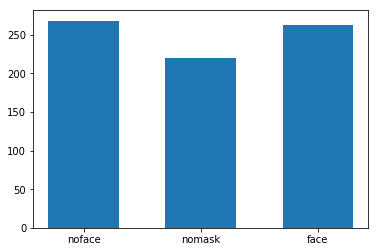

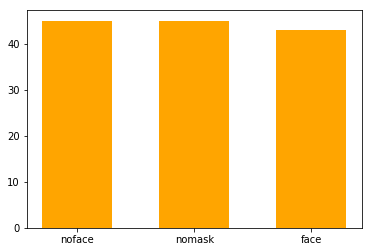

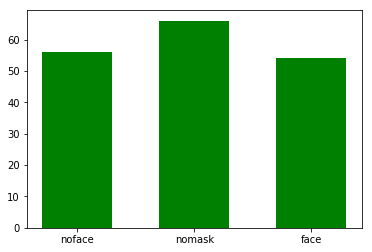

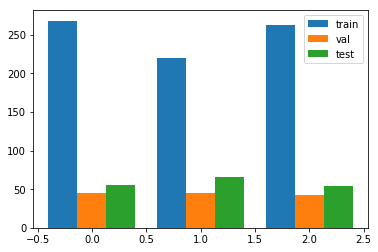

In [3]:
train = get_value(train_dir, 0.85, True)
val = get_value(train_dir, 0.85, False)
test = get_value(test_dir, 0, False)
labels = ['noface', 'nomask', 'face']

print(train, val, test)

plt.bar(range(len(train)), train, width=0.6, tick_label=labels)
plt.show()
plt.bar(range(len(val)), val, width=0.6, tick_label=labels, fc='orange')
plt.show()
plt.bar(range(len(test)), test, width=0.6, tick_label=labels, fc='g')
plt.show()

import numpy as np

x = np.arange(3)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2
 
plt.bar(x, train,  width=width, label='train')
plt.bar(x + width, val, width=width, label='val')
plt.bar(x + 2 * width, test, width=width, label='test')
plt.legend()
plt.show()